#**Trực quang hóa dữ liệu về rựu vang đỏ**

##**A Chuẩn bị dữ liệu**

###**1. Nguồn gốc dữ liệu**

###Dataset from kaggle: *https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009*

Bộ dữ liệu này là về rượi vang đỏ "Vinho Verde" của Bồ Đào Nha. Nó thường được dùng để huấn luyện cho các loại mô hình máy học nhằm phân loại chất lượng của rượi vang đỏ. Bạn có thể tìm thêm thông tin từ trang UIC của dataset này: *https://archive.ics.uci.edu/dataset/186/wine+quality*

###**2. Import thư viện và nạp dữ liệu**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df=pd.read_csv('/content/drive/MyDrive/SGU/Machine Learning/Bai tap lab/lab5/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

##**B. Trực quang hóa đơn biến**

###**1. Boxplot**

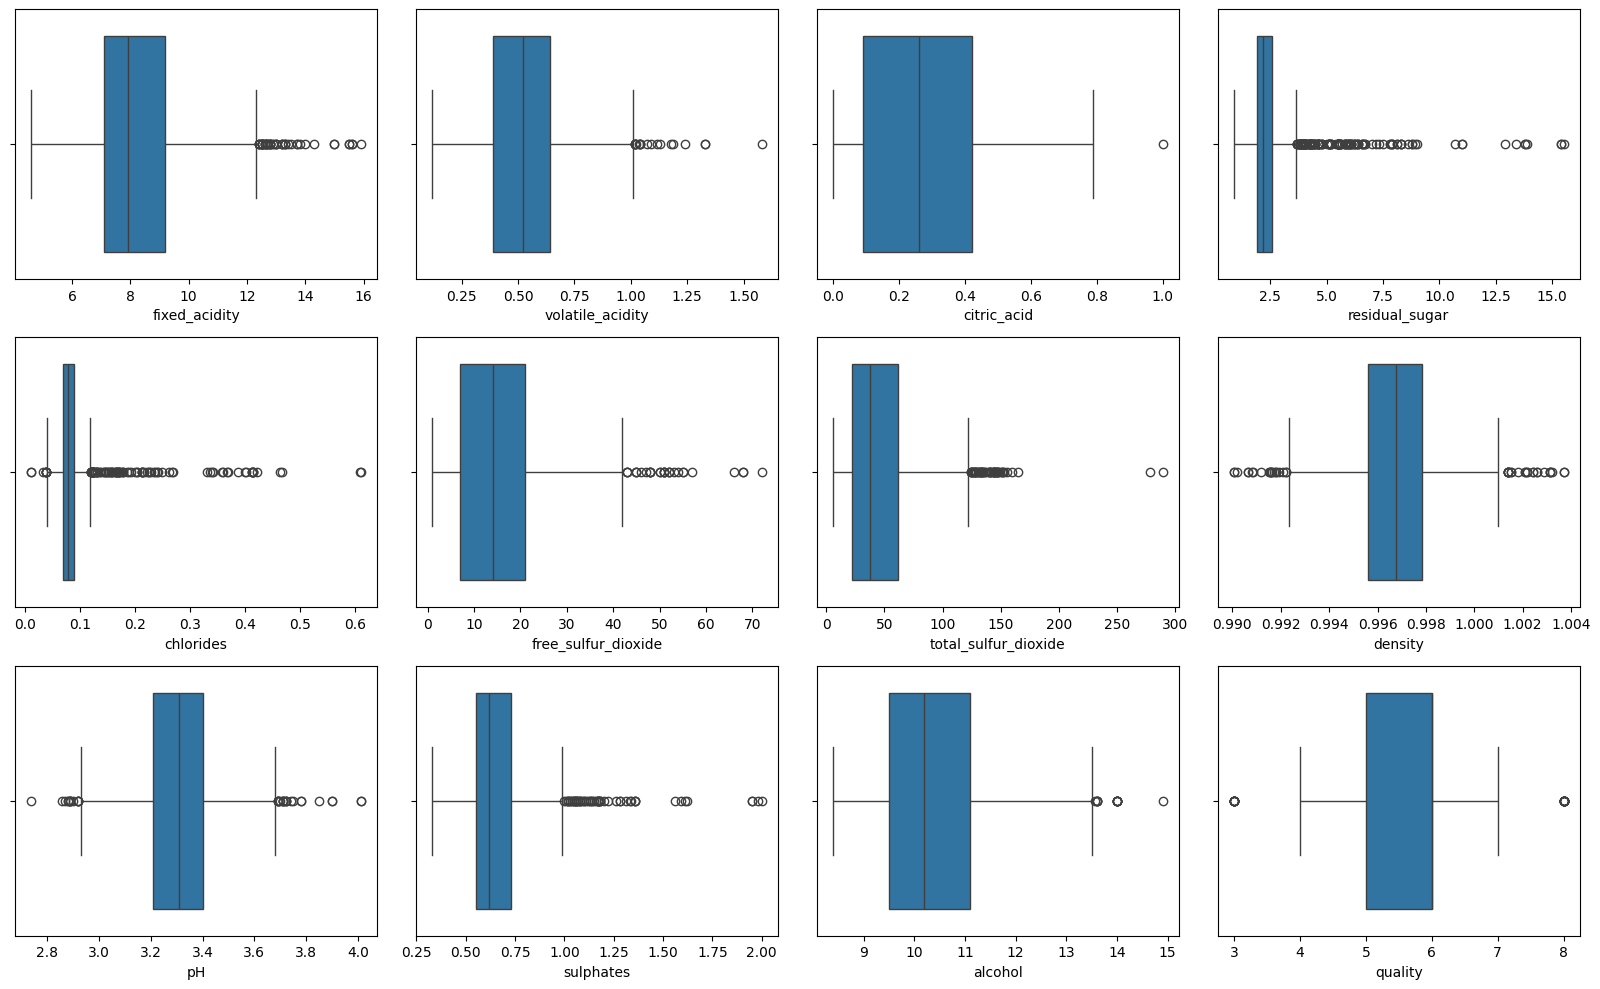

In [35]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])

plt.tight_layout()
plt.show()

###**2. Histogram**

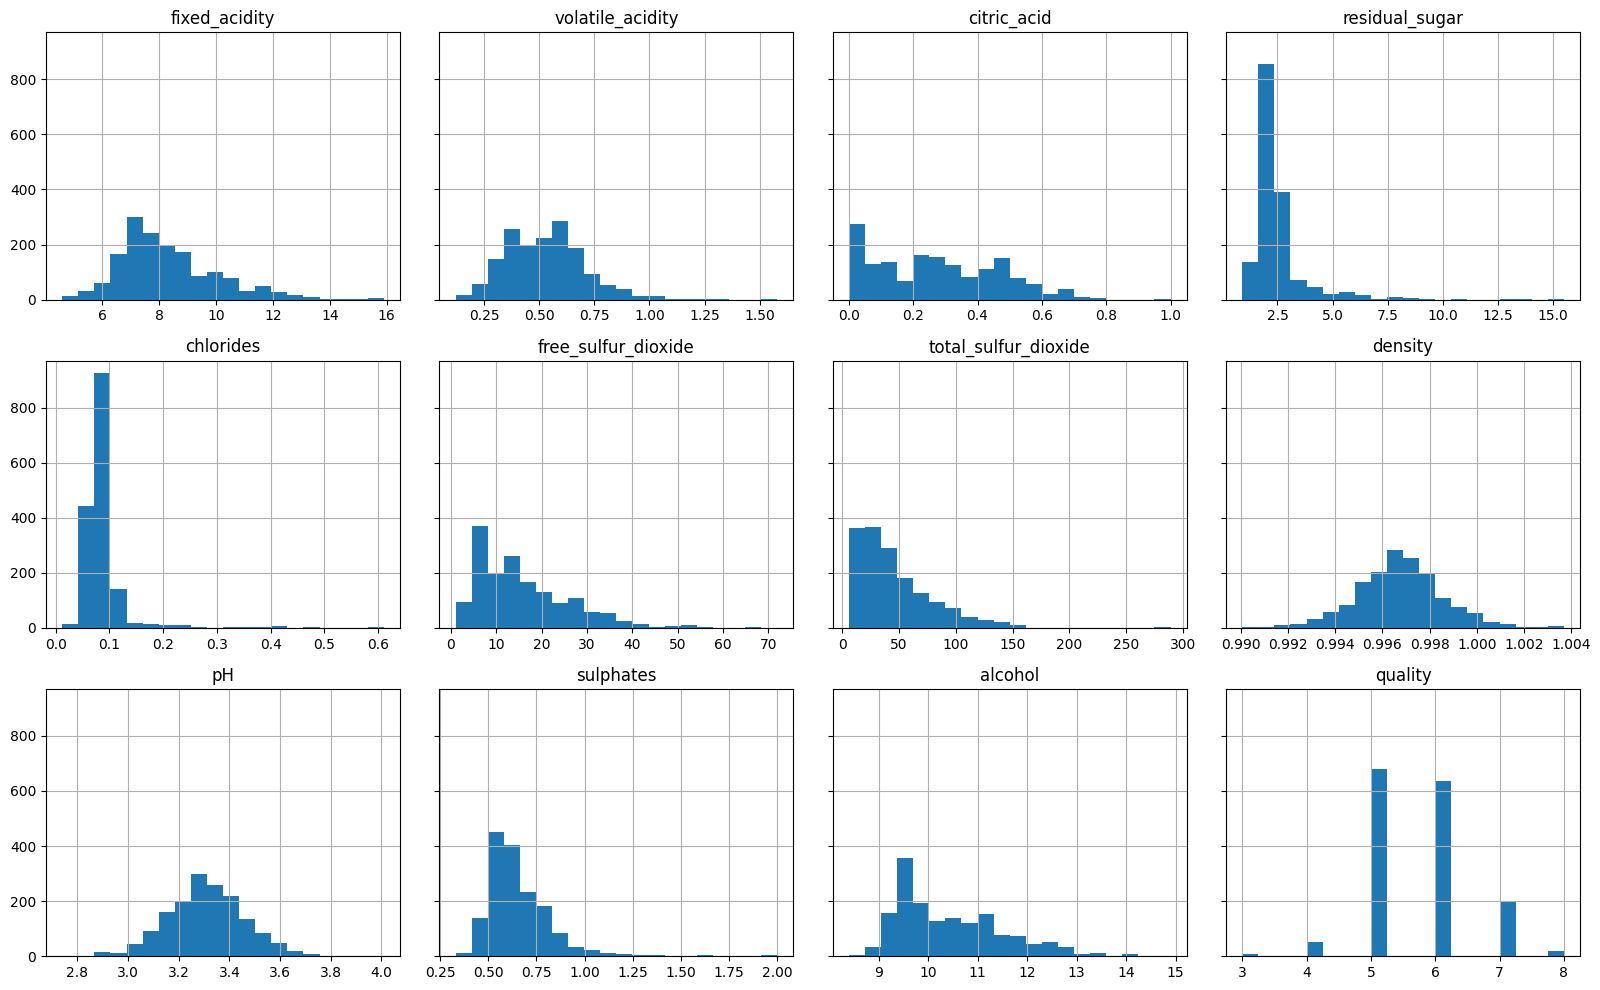

In [36]:
df.hist(bins=20, figsize=(16, 10), layout=(3, 4), sharey=True)
plt.tight_layout()
plt.show()

**Nhận xét:**
- **quality:** Giá trị chất lượng chủ yếu tập trung ở mức giữa và có thể thấy dữ liệu có thể chia thành 3 nhóm chất lượng là thấp, trung bình(chiếm đa số) và cao <br>
- **residual_sugar, chlorides, total sulfur dioxide,sulphates:** các feature này có phân bố giá trị lệch sâu về phía các giá trị nhỏ. Nhưng bên cạnh đó các feature này lại có các điểm ngoại lai với giá trị lớn hơn nhiều và cần được xử lý.
- Các feature còn lại có sự phân bố giá trị khá đông đều  

**\*Một tí biến đổi cho mọi thứ dễ hiểu hơn**

In [37]:
def categorize_quality(quality):
    if quality <= 4:
        return 'low'
    elif quality <= 6:
        return 'medium'
    else:
        return 'high'

df['quality_category'] = df['quality'].apply(categorize_quality)
display(df.head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium


Ở đây tôi đã tạo ra thêm một cột phân nhóm của quality từ những nhận xét phía trên. Từ đó giúp việc mô hình hóa dữ hiệu và việc hiểu được giá trị của dữ liệu dễ dàng hơn.

###**Pie chart với feature quality đã được phân nhóm:**


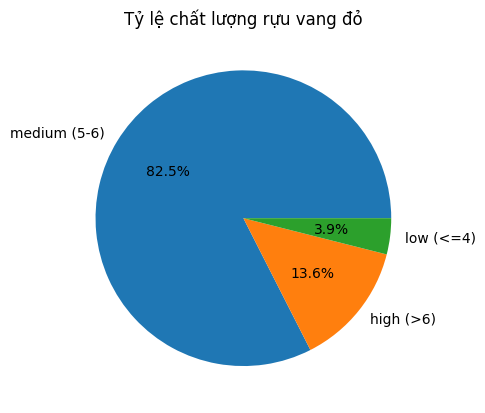

In [38]:
quality_counts = df['quality_category'].value_counts()
labels = [f'{label} ({category})' for label, category in zip(quality_counts.index, ['5-6', '>6', '<=4'])]
plt.pie(quality_counts, labels=labels, autopct='%1.1f%%')
plt.title("Tỷ lệ chất lượng rựu vang đỏ")
plt.show()

**Nhận xét:** <br>
- Những sản phẩm rựu vang đỏ có chất lượng trung bình(quality trong khoảng 5-6) chiếm phần lớn trong bộ dữ liệu (82.5%)
- Chất lượng cao(quality >6) chiếm 13,6%
- Chất lượng thấp(quality <=4) chỉ chiểm 3,9%

##**C. Trực quang hóa đa biến**

### **1. Pairplot**

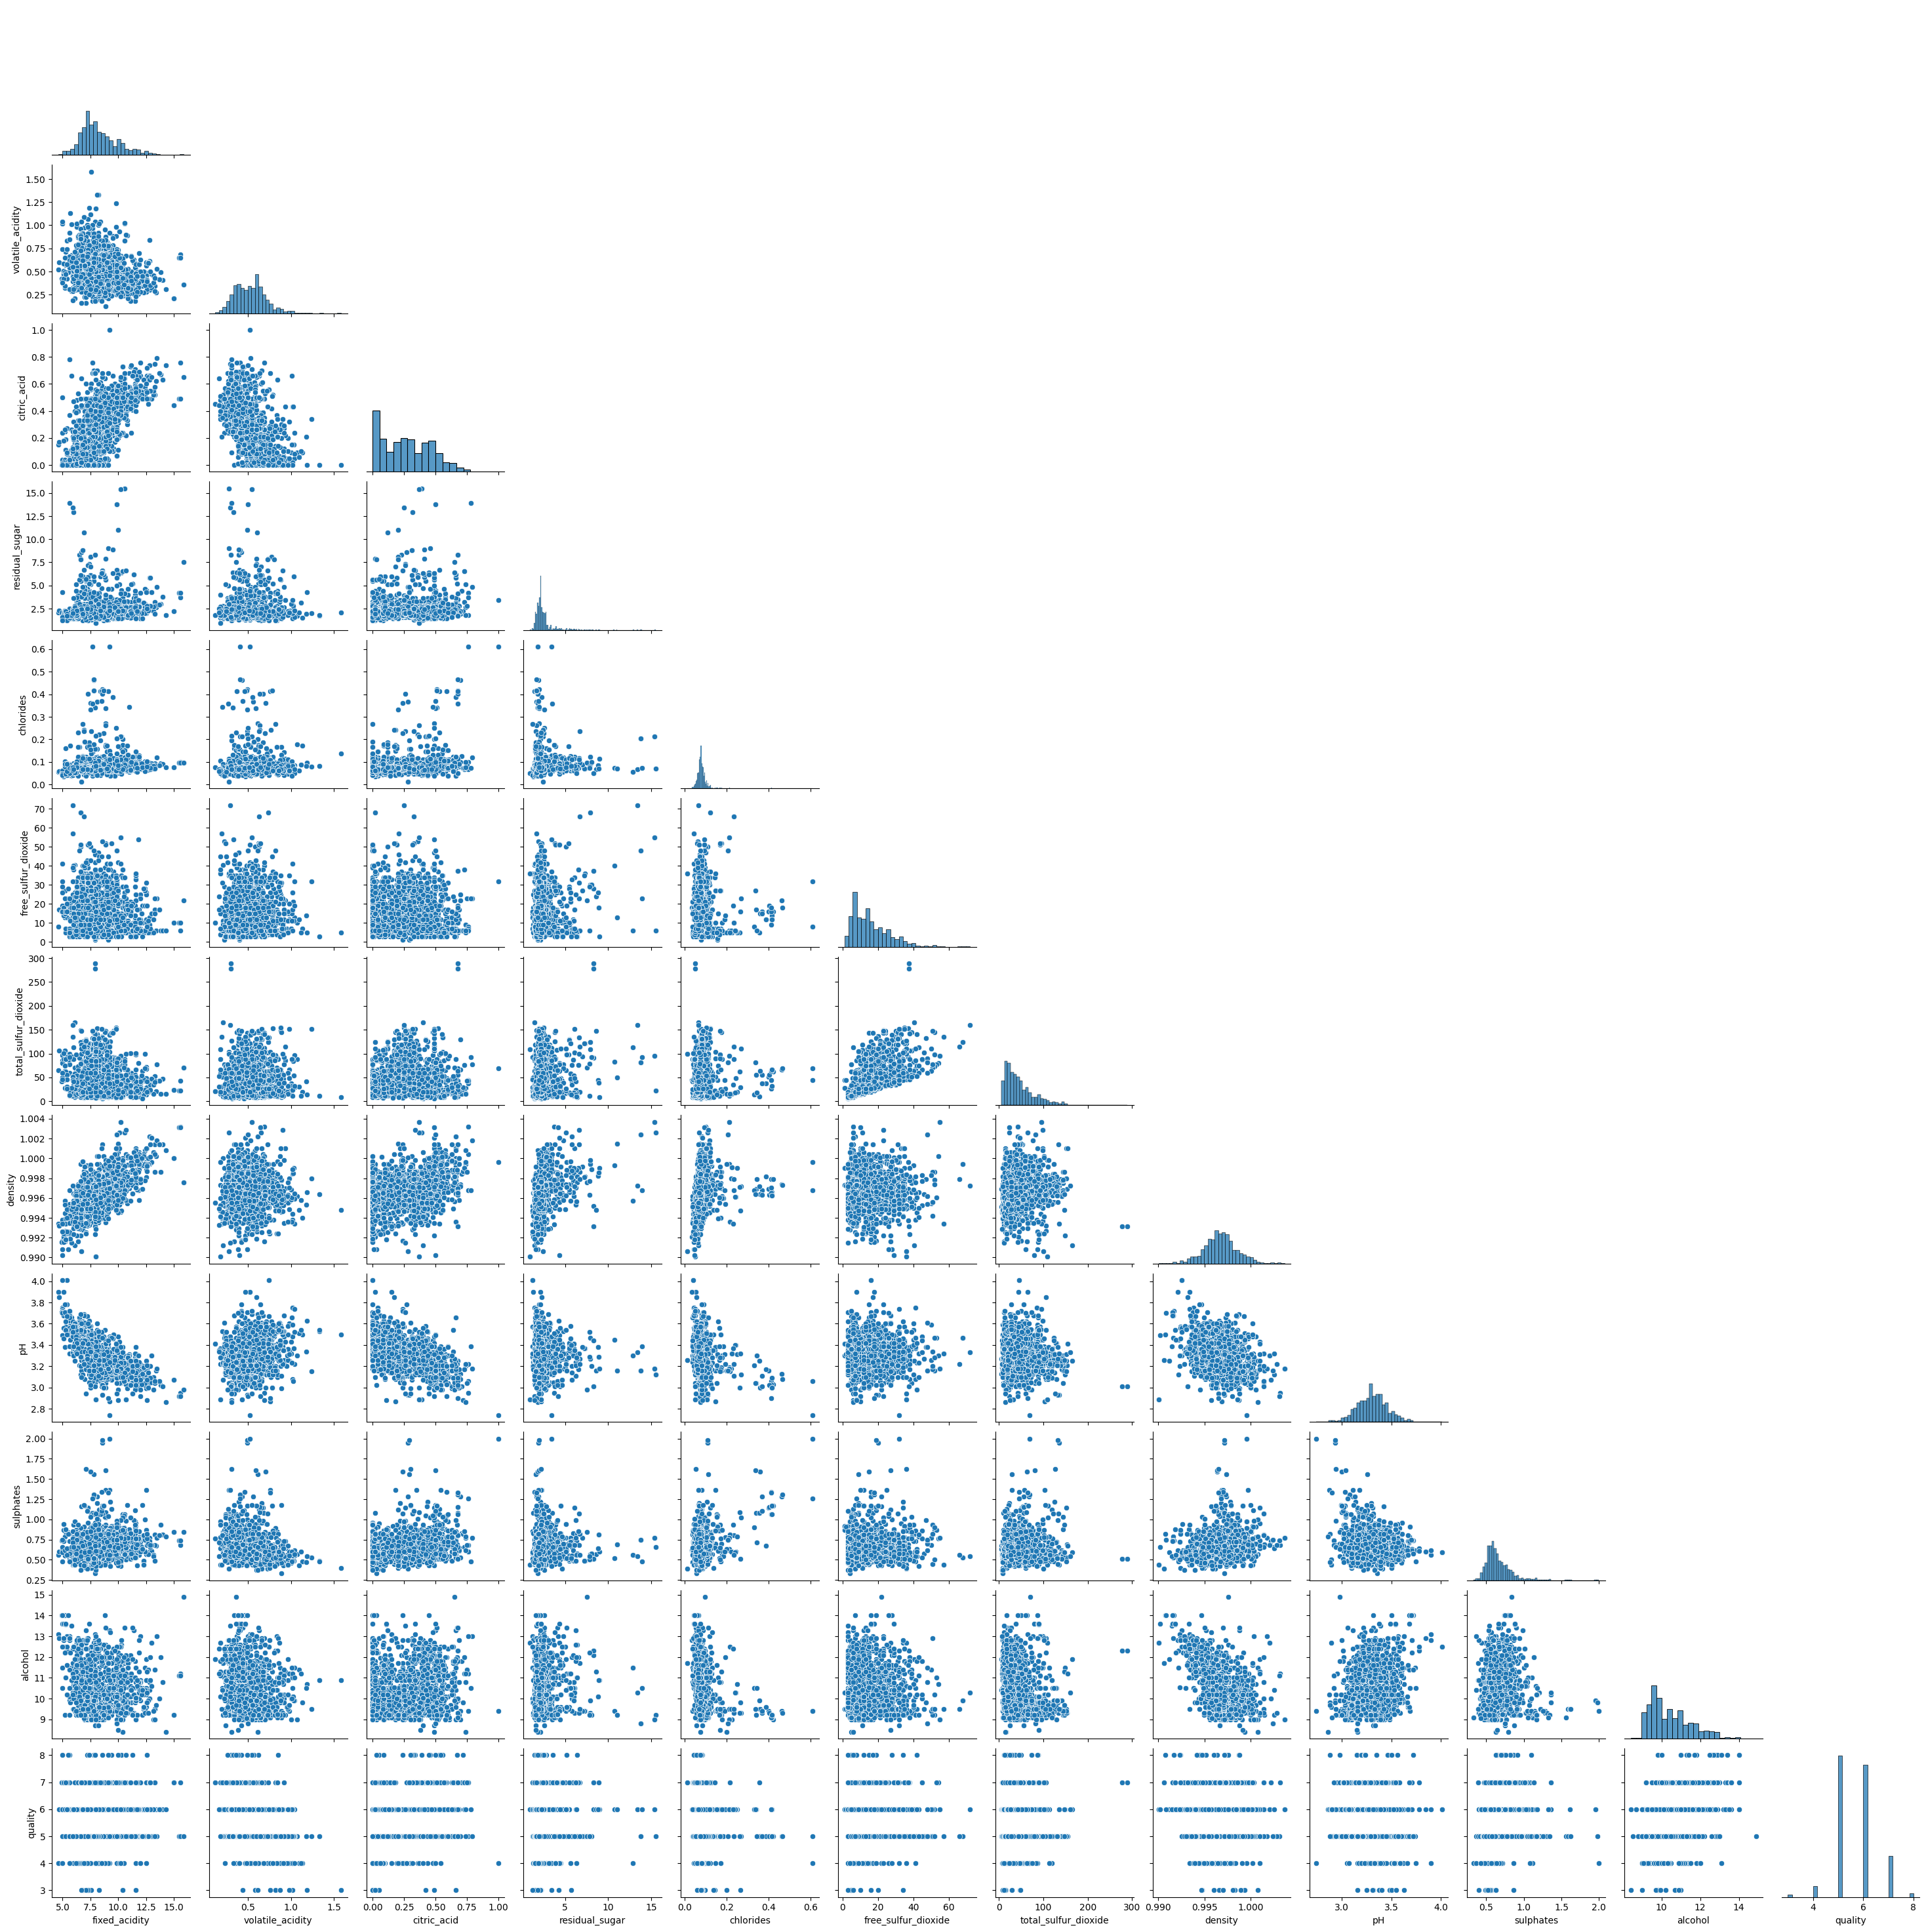

In [39]:
sns.pairplot(df, corner=True)
plt.show()

### **2. Heatmap and Correlation**

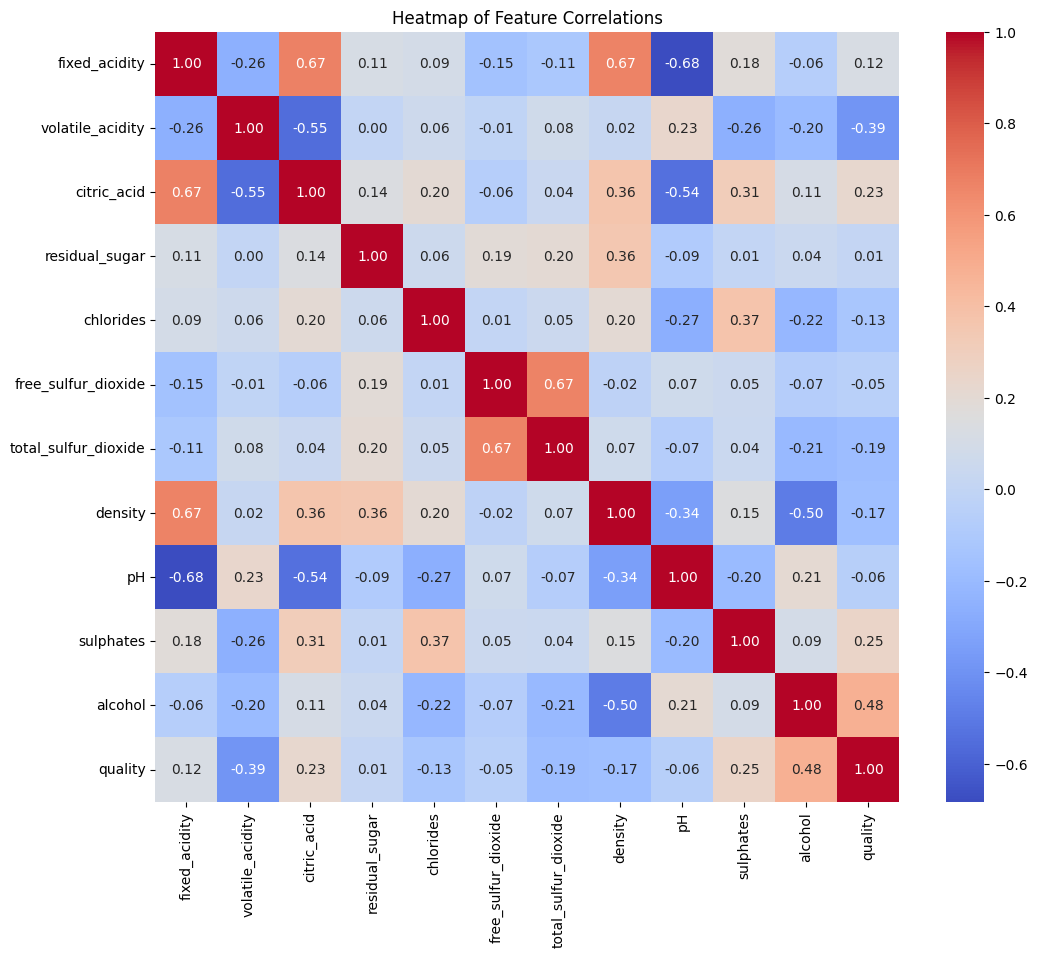

In [40]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

&nbsp;&nbsp;*Qua heatmap về sự liên quan giữa các feature với nhau ở trên ta có thể thấy chỉ có hai thuộc là **volatile_acidity (-0.39)** và **alcohol (0.48)** là có mối quan hệ chặt chẽ với thuộc tính quality. Điều này cũng khá phù hợp theo kiến thức thực tế về rựu. Ngoài ra, có hai trường cũng có mức độ liên quan khá cao với thuộc tính quality là **sulphates (0.25)** và **citric_acid (0.23)**


***Biểu đồ regplot giữa alcohol và quality**

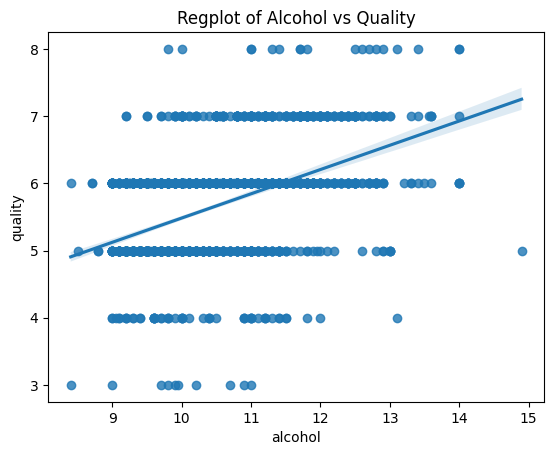

In [43]:
sns.regplot(x='alcohol', y='quality', data=df)
plt.title('Regplot of Alcohol vs Quality')
plt.show()

***Biểu đồ regplot giữa volatile_acidity và quality**

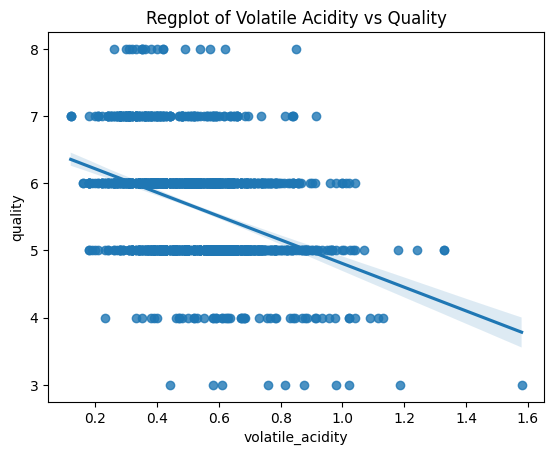

In [44]:
sns.regplot(x='volatile_acidity', y='quality', data=df)
plt.title('Regplot of Volatile Acidity vs Quality')
plt.show()

***Biểu đồ cột về sự tương quan giữa quality và các feature còn lại**

/tmp/ipython-input-3381084374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_quality.index, y=correlations_with_quality.values, palette='viridis')


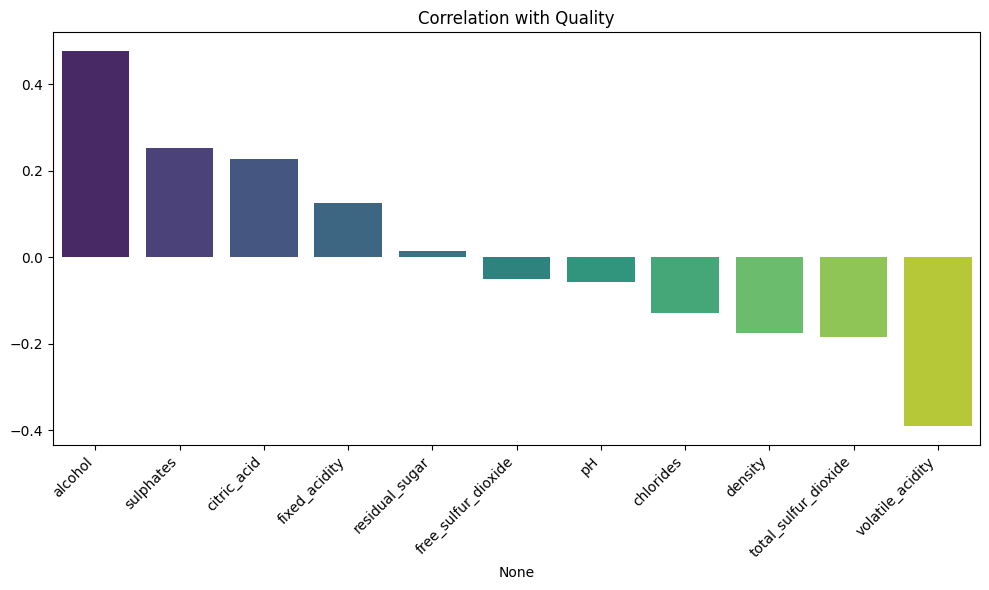

In [46]:
correlations_with_quality = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_quality.index, y=correlations_with_quality.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation with Quality')
plt.tight_layout()
plt.show()